## Classification 

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this project is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations


## STEP 1: Feature space visualization

We will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

C:\Users\MCNrm\AppData\Local\Temp\ipykernel_27268\2760979751.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])


<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

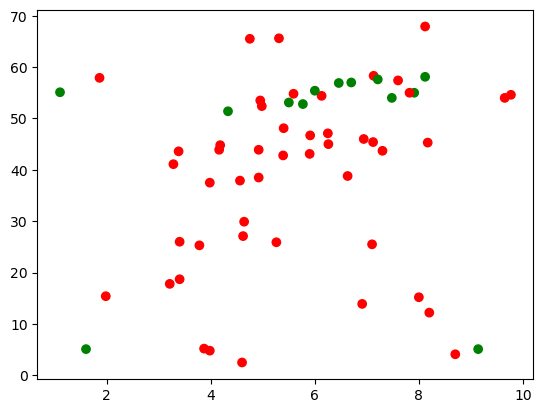

In [103]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

The label status were binarized to create two classes.

This feature space is not easily separable. The data are mixed together, so we can't separate them by using for example SVM.

We plot Total expenditure against Schooling

C:\Users\MCNrm\AppData\Local\Temp\ipykernel_27268\3327893281.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])


<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

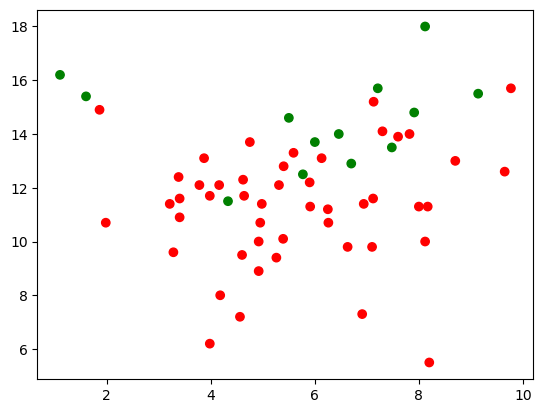

In [107]:
df_X = df1[['Total_expenditure', 'Schooling']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

We plot Life Expectancy against Schooling

C:\Users\MCNrm\AppData\Local\Temp\ipykernel_27268\1489900149.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])


<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

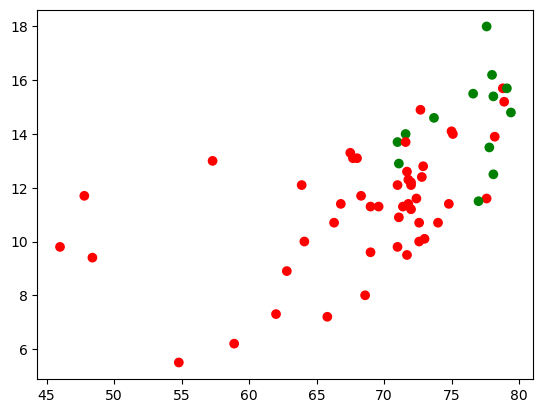

In [110]:
df_X = df1[['Life_expectancy', 'Schooling']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

The best feature seems to be the last one where we compare Life expectancy and Schooling, because the green points representing the developed countries are not scattered.

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1).

In [115]:
df_X_norm = ((df_X-df_X.min())/(df_X.max()-df_X.min()))
np_X_norm = df_X_norm.to_numpy()
np_Y = df_Y.to_numpy()

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

**KNN classification**

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9294871794871794


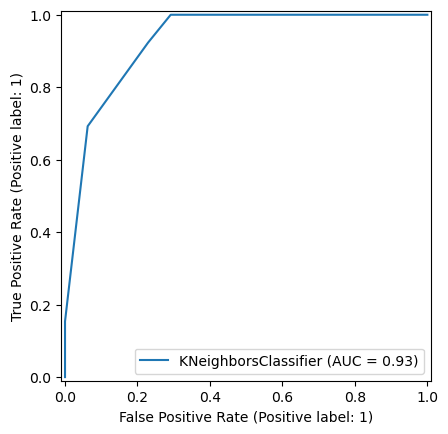

In [119]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay #plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf1, np_X_norm, np_Y)
plt.show()

**Support Vector Classification / SVM**

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9198717948717949


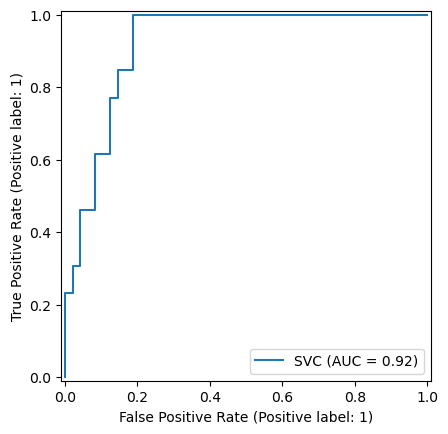

In [121]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability = True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf2, np_X_norm, np_Y)
plt.show()

**Decision tree**

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9799679487179488


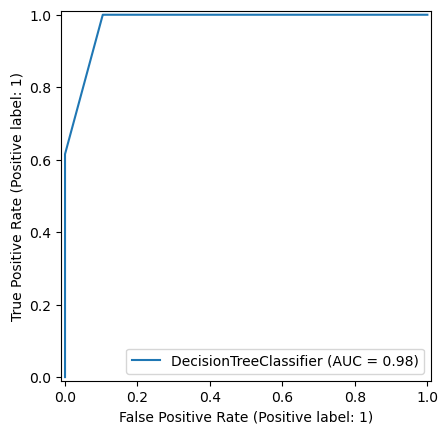

In [125]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf3, np_X_norm, np_Y)
plt.show()

**Random forest classification**

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.985576923076923


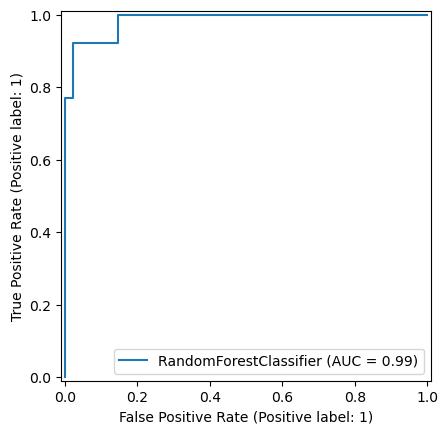

In [127]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf4, np_X_norm, np_Y)
plt.show()

The AUC is the Area Under the ROC Curve.

All ROC curves obtained are efficient because they are concave. We know that the more concave, the better.

To maximize the sensitivity, we want to find the lowest FPR with the highest TPR

The sensitivity is maximum if TPR = 1.
The specificity is maximum if FPR = 1 - specificity = 0.

The best point to maximise the sensitivity is when the ROC curve first reaches the maximum

The best point to maximise the specificty is the beginning of the ROC curve whith a non-null TPR.

According to this, the last model is the best.

The last model's AUC is the highest, so the better.



For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

We plot the decision boundary with df_X for each classifiers

<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

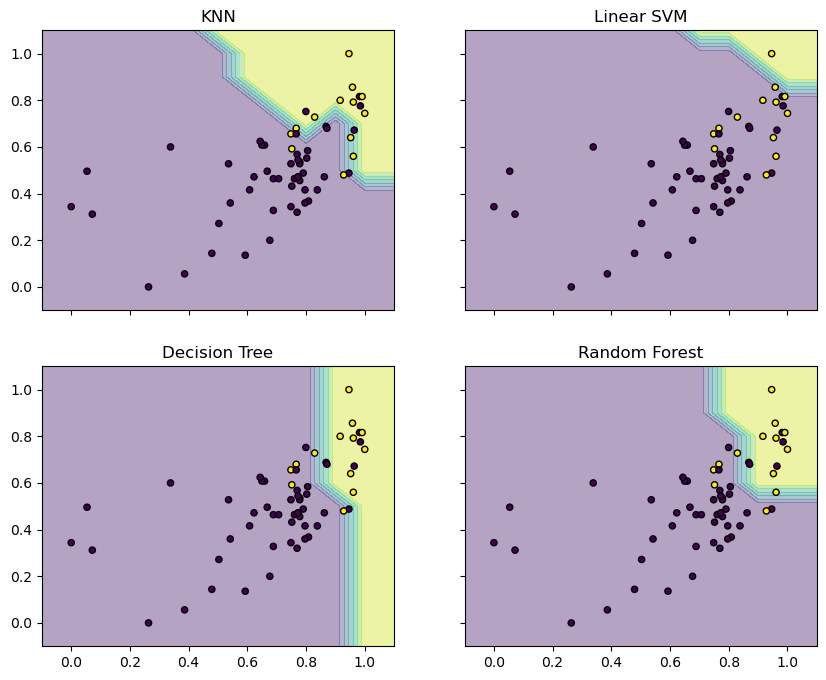

In [132]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

The main problem is that there is overlapping between the two classes, so it's impossible to have FNR = 0 and FPR = 0.

The linear SVM is definitely not the best suited for this classification task.

The decision tree's boundary is unnecessarily going to the bottom. The same goes for the KNN's boundary, which goes to the top center.

So the better one is the random forest classifier.

## STEP 3: Biases correction and model tuning

In this part, we will focus on improving the AUC scores of the four methods.

Firstable, we will weigh the classes to balance the classifier response. Then we will tune various hyperparameters.

We compute the percentage of "Developed" class against the size the np_Y.

In [138]:
developed = df_Y[(df_Y.Status == 1)]
print('The percentage of developed country is', len(developed)/len(np_Y))

The percentage of developed country is 0.21311475409836064


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


For each class i, the weight values is :

$w_{i}=n_{samples} / (n_{classes} * n_{i})$

where $n_{samples}$ is the total number of samples 

$n_{classes}$ is the total number of unique classes

$n_i$ is the total number of rows of the respective class

So :

$w_0 = 61 / (2*48)$ 

$w_1 = 61 / (2*13)$


In [143]:
print(len(df_Y[(df_Y.Status == 0)])) #developing
print(len(df_Y[(df_Y.Status == 1)])) #developed
print(len(df_Y)) #total
print("The weight for class 0 is",61 / (2*48))
print("The weight for class 1 is",61 / (2*13))

48
13
61
The weight for class 0 is 0.6354166666666666
The weight for class 1 is 2.3461538461538463


We balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

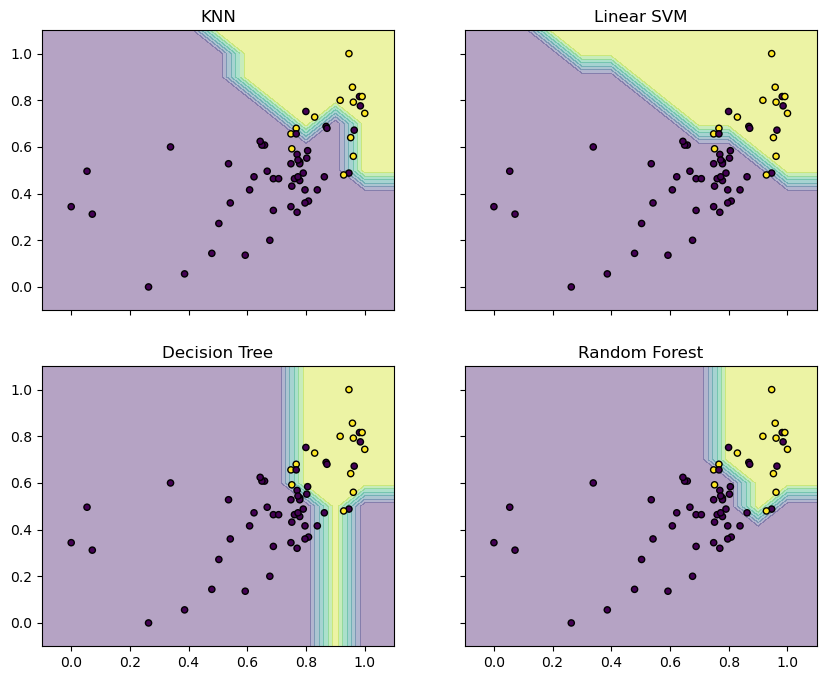

In [146]:
# n_samples = len(df_Y)
# n_samples0 = len(df_Y[(df_Y.Status == 0)])
# n_samples1 = len(df_Y[(df_Y.Status == 1)])
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(np_X_norm, np_Y)

clf6 = SVC(C=2.0, kernel='linear', probability = True, class_weight='balanced')
clf6.fit(np_X_norm, np_Y)

clf7 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf7.fit(np_X_norm, np_Y)

clf8 = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
clf8.fit(np_X_norm, np_Y)

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf5, clf6, clf7, clf8],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**TO CODE 3.3**

Compute the new AUC scores

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9182692307692308


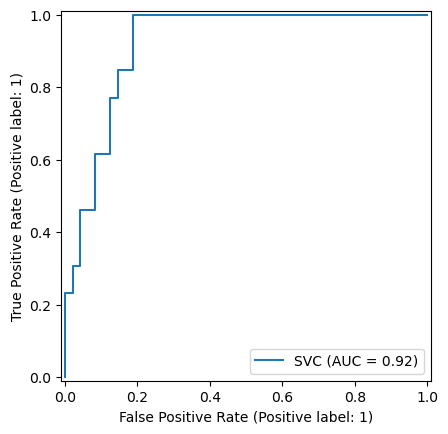

In [149]:
np_Y_pred = clf6.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf2, np_X_norm, np_Y)
plt.show()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9423076923076923


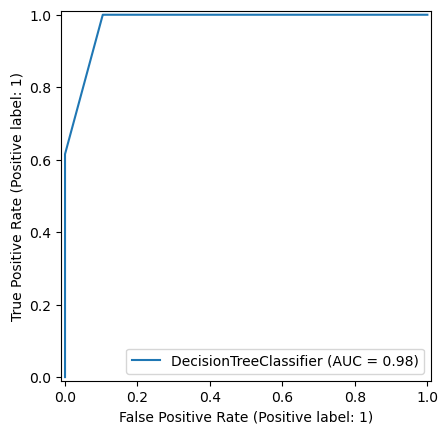

In [151]:
np_Y_pred = clf7.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf3, np_X_norm, np_Y)
plt.show()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.983974358974359


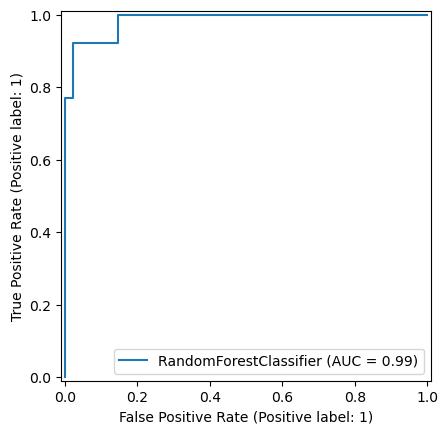

In [153]:
np_Y_pred = clf8.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf4, np_X_norm, np_Y)
plt.show()

The classe balance improved the classification, as we can see with the plot of the decision boundaries.




Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


We test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

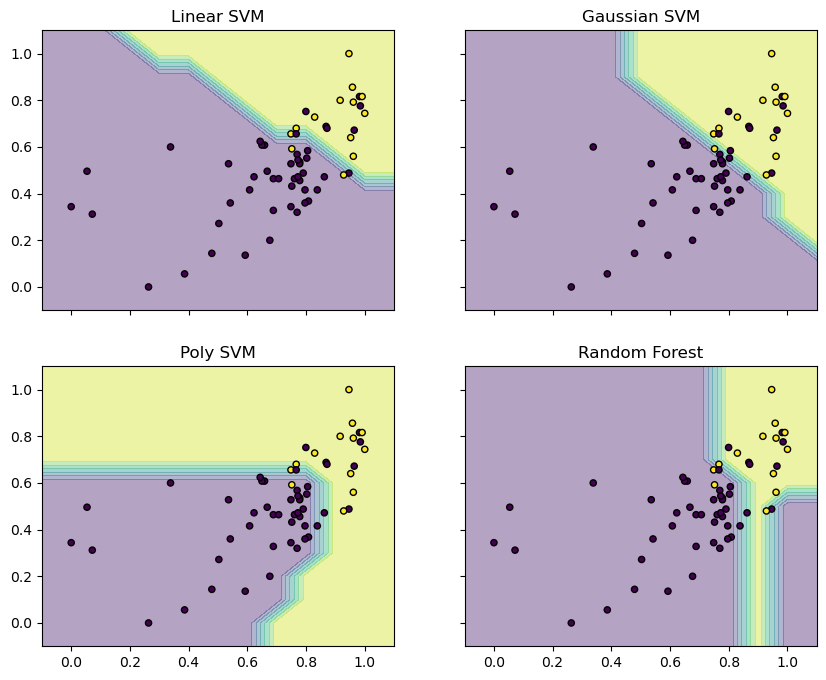

In [158]:
# n_samples = len(df_Y)
# n_samples0 = len(df_Y[(df_Y.Status == 0)])
# n_samples1 = len(df_Y[(df_Y.Status == 1)])
clf9 = SVC(C=2.0, kernel='linear', probability = True, class_weight='balanced')
clf9.fit(np_X_norm, np_Y)

clf10 = SVC(C=2.0, kernel='rbf', probability = True, class_weight='balanced')
clf10.fit(np_X_norm, np_Y)

clf11 = SVC(C=2.0, kernel='poly', probability = True, class_weight='balanced')
clf11.fit(np_X_norm, np_Y)

clf12 = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
clf12.fit(np_X_norm, np_Y)

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf9, clf10, clf11, clf12],
                        ['Linear SVM', 'Gaussian SVM', 'Poly SVM', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

For this dataset, the best kernel is the Gaussian kernel 'rbf', because the decision boundary of the Polynomial SVM takes more place than required.

**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

We trained several classifiers on two features extracted from the year 2000.

We now apply our models on the year 2012

In [164]:
df2 = df[(df.Year == 2012)]

C:\Users\MCNrm\AppData\Local\Temp\ipykernel_27268\3158536069.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])


<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

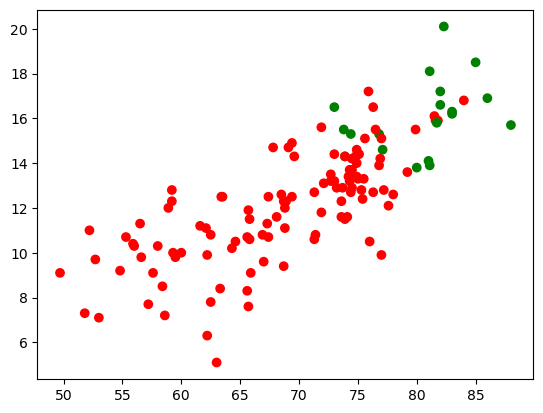

In [166]:
df_X = df2[['Life_expectancy', 'Schooling']]
df_Status = df2[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

In [168]:
df_X_norm = ((df_X-df_X.min())/(df_X.max()-df_X.min()))
np_X_norm = df_X_norm.to_numpy()
np_Y = df_Y.to_numpy()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9519138755980862


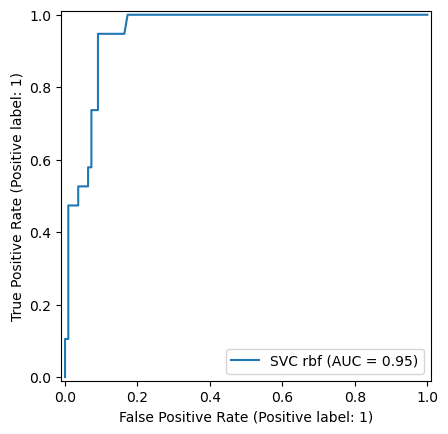

In [199]:
np_Y_pred = clf10.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf10, np_X_norm, np_Y, name="SVC rbf")
plt.show()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9528708133971292


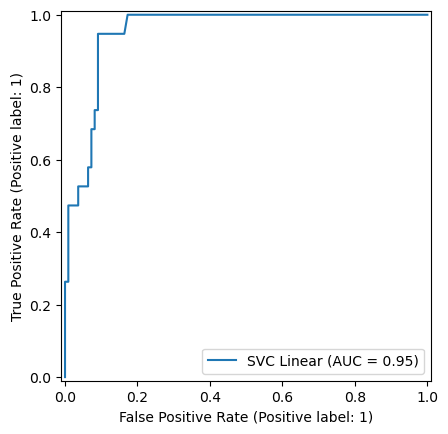

In [201]:
np_Y_pred = clf9.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf9, np_X_norm, np_Y, name="SVC Linear")
plt.show()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.8566985645933014


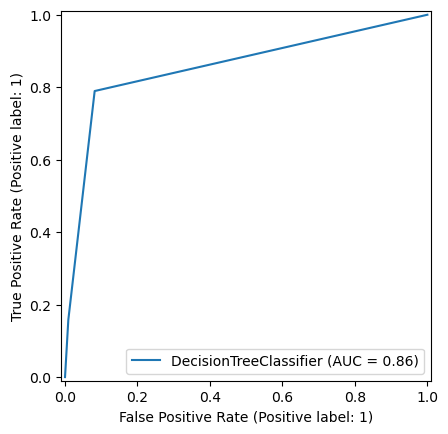

In [184]:
np_Y_pred = clf7.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf7, np_X_norm, np_Y)
plt.show()

C:\Users\MCNrm\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9449760765550239


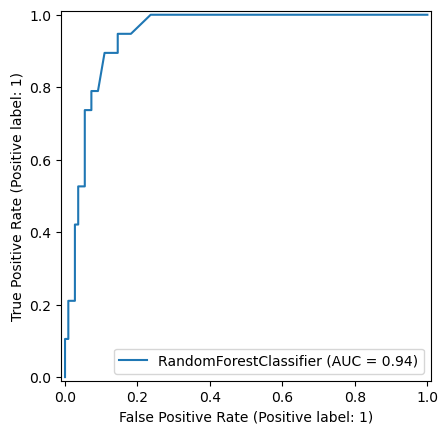

In [195]:
np_Y_pred = clf12.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
RocCurveDisplay.from_estimator(clf12, np_X_norm, np_Y)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

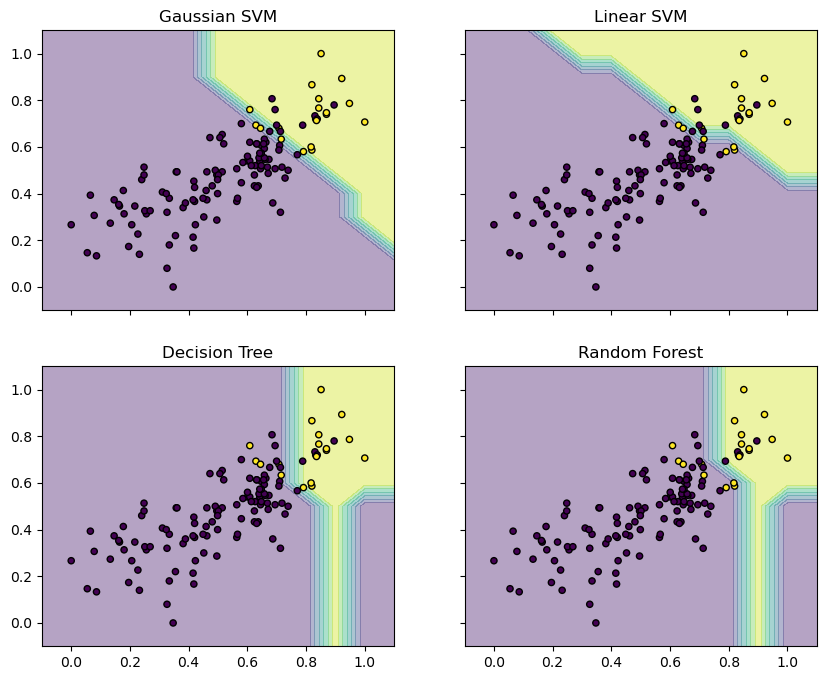

In [203]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf10, clf9, clf7, clf12],
                        ['Gaussian SVM', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

<module 'matplotlib.pyplot' from 'C:\\Users\\MCNrm\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

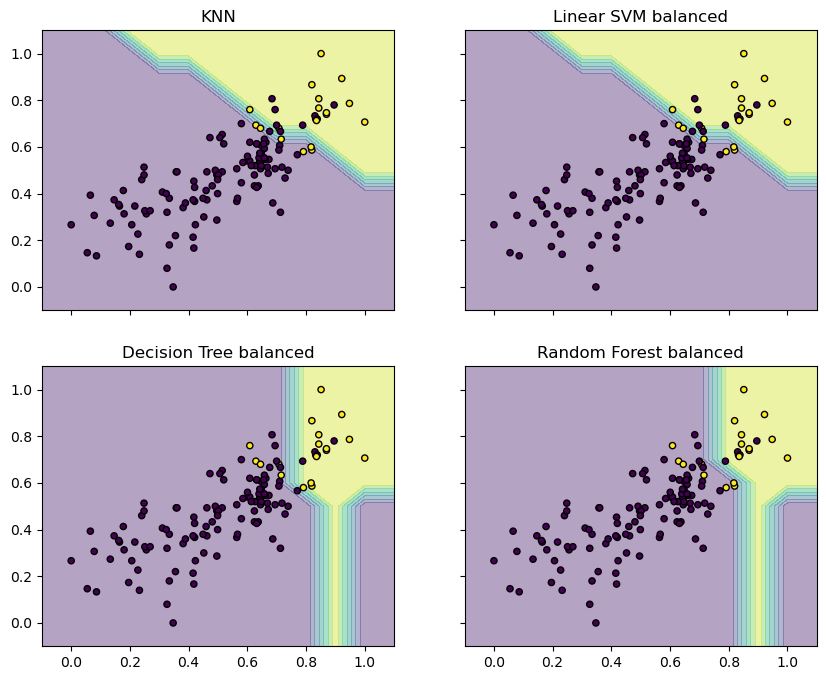

In [205]:
# n_samples = len(df_Y)
# n_samples0 = len(df_Y[(df_Y.Status == 0)])
# n_samples1 = len(df_Y[(df_Y.Status == 1)])

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf6, clf9, clf7, clf12],
                        ['KNN', 'Linear SVM balanced', 'Decision Tree balanced', 'Random Forest balanced']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

Our models are still relevant in the year 2012. Indeed, the boudaries are similar to the previous ones.